In [1]:
from src import espresso_machine as esma

In [2]:
#Step 1 - Initialize model
model = esma.project(project_id="B_striped") #Define project
model.set_cores(64) #Define number of prcessing cores
model.get_structure(format='poscar',path='Research/2D_Materials/Structure/',name='B_striped.poscar') #Load structure
model.set_pseudo(path='./Research/2D_Materials/PP/PBE/US')

In [3]:
model.ecutwfc(100) #Set wavefunction cutoff
model.ecutrho(800) #Set wavefunction cutoff
model.k_points([40,30,1]) #Set number of k points
model.degauss(0.02) #Set degauss value
model.conv_thr(1e-12) #Set convergence threshold
model.ph_thr(1e-16) #Set convergence threshold
model.smearing('mv')
model.etot_conv_thr(10**-7) 
model.forc_conv_thr(10**-6)
model.config['pw']['electrons']['electron_maxstep'] = 500
model.config['pw']['electrons']['exx_maxstep'] = 500
model.config['pw']['electrons']['mixing_beta'] = 0.1
model.stress()
model.force()

In [4]:
model.starting_potential('file')

In [5]:
model.relax_iteration(calculation='relax')

Starting relax iteration 1 
relax
relax is converged after 1 steps


In [4]:
#Step 2 - Crystal optimization
model.calculate('vc-relax')
model.get_structure('vc-relax') #Get relaxed strucutre


vc-relax for results is started
vc-relax for results is finished


In [6]:
#Step 4 - Scf calculation
for i in range(5):
    model.calculate('relax')
    model.get_structure('relax') #Get relaxed strucutre

relax for results is started
relax for results is finished
relax for results is started
relax for results is finished
relax for results is started
relax for results is finished
relax for results is started
relax for results is finished
relax for results is started
relax for results is finished


In [20]:
model.get_structure('relax') #Get relaxed strucutre

In [21]:
model.export_structure(format='poscar',file_path='Research/2D_Materials/Structure/')

In [17]:
def check_relax(path='Projects/B_striped/results/vc-relax.out'):
    lines = open(path, 'r').readlines()
    for i in lines:
        if "bfgs failed after" in i:
            return False
        if "bfgs converged" in i:
            return True

In [18]:
check_relax()

     bfgs failed after   4 scf cycles and   3 bfgs steps, convergence not achieved



In [6]:
#Step 4 - Scf calculation
model.get_structure('relax') #Get relaxed strucutre
model.calculate('scf')

scf for results is started
scf for results is finished


In [7]:
#Step 5 - Bands calculation
path = ['GAMMA','Y',"S","X","GAMMA"] #define corners
model.band_points(path,number=50) #define path
model.calculate('bands')

bands for results is started
bands for results is finished
bands-pp for results is started
bands-pp for results is finished


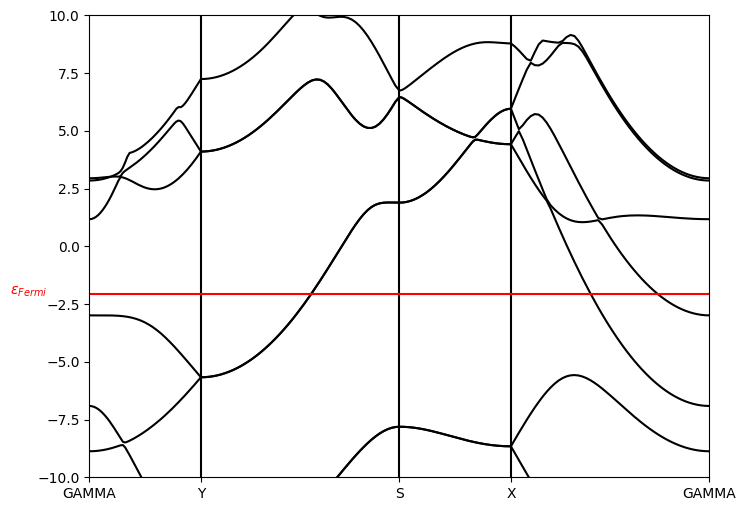

In [8]:
#Step 6 - Plotting
model.plot('electron',ylim=[-10,10],save=True) #plot electron bands

In [9]:
# Step 5 - Run ph.x
model.set_q(nq1=13,nq2=11,nq3=1) #Set parameters
model.calculate('ph')

ph for results is started


In [ ]:
#Step- 2 - Run q2r.x
model.calculate('q2r') #Run calculation

In [ ]:
#Step 3 - Run matdyn.x
num_points = 200 # Number of q points
model.calculate("matdyn") #Run calculation

In [ ]:
#Step 4 - Plotting
model.plot('phonon',save=True) # Plot phonon band